## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [19]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [20]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [21]:
# 把兩個訓練資料集和測試資料集讀進來
test=pd.read_csv('Titanic_test.csv')
train=pd.read_csv('Titanic_train.csv')


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [22]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
test.info()
train.info()
print('有差異')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [23]:
#可以嘗試用範例的程式
print(test.isnull().any())
print('有遺失值')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
有遺失值


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

以平均值補差值 :

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
共有 5 個遺失值


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


以平均補遺漏值: 死亡人數比例集中在20 ~ 40歲左右，而存活人數比例則集中在0歲左右及20 ~ 40歲左右。其中，兩者皆以30歲左右的人數最多。


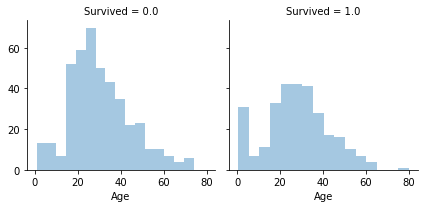

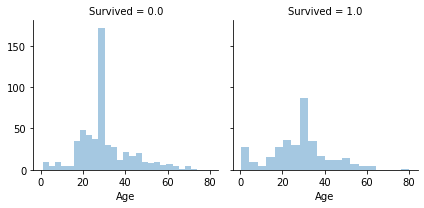

In [56]:
#合併資料
afterMerge=train.append(test)
afterMerge
print(afterMerge.isnull().sum())
print('共有',afterMerge.isnull().any().sum(),'個遺失值')
#補值前:
g = sns.FacetGrid(afterMerge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


#補值後:
afterMerge['Age']=afterMerge['Age'].fillna(afterMerge['Age'].mean())

#afterMerge[afterMerge['Fare'].isnull().values==True]
# 連續型用分布圖行來看
g = sns.FacetGrid(afterMerge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
afterMerge['Age']=afterMerge['Age'].fillna(afterMerge['Age'].mean())

print('以平均補遺漏值: 死亡人數比例集中在20 ~ 40歲左右，而存活人數比例則集中在0歲左右及20 ~ 40歲左右。其中，兩者皆以30歲左右的人數最多。')

由後往前補:

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
共有 5 個遺失值


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


由後往前捕值: 我們可看出存活人數比例及死亡人數比例皆較集中在0歲左右及20 ~ 40 歲中。其中，死亡人數以20初頭的人最多，而存活人數以30歲左右的人最多。


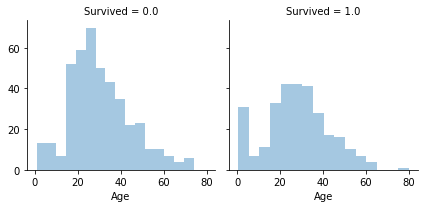

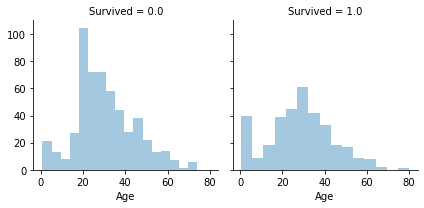

In [55]:
afterMerge=train.append(test)
afterMerge
print(afterMerge.isnull().sum())
print('共有',afterMerge.isnull().any().sum(),'個遺失值')
#補值前:
g = sns.FacetGrid(afterMerge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後:
afterMerge['Age']=afterMerge['Age'].fillna(method='pad')
g = sns.FacetGrid(afterMerge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


print('由後往前捕值: 我們可看出存活人數比例及死亡人數比例皆較集中在0歲左右及20 ~ 40 歲中。其中，死亡人數以20初頭的人最多，而存活人數以30歲左右的人最多。')

